### Machine Learning
    - Tabular data için Machine Learning tercih edilir.Data miktarı büyükse veya tabular değilse Deep Learning tercih edilir
    - Geleneksel programlamada modele kuralları ve veriyi girdi olarak verirsiniz ve cevapları çıktı olarak alırsınız.
    - Machine learning'de ise cevapları ve veriyi girdi olarak verirsiniz ve kuralları çıktı olarak alırsınız.
    - Recommendation Engines, Customer Churn, New Pricing Models, Purchasing Trends, Pattern and Image Recognition gibi pek çok alanda kullanılır.
    - Machine learning alanı deneysel bir alandır. Deneme-yanılma ile en uygun sonuç bulunur.
    - Outlier değerler modelin hata yapmasına neden olur. Bazen outlier değeri atınca iyi sonuç alırsınız, bazen outlier değeri atmayınca iyi sonuç alırsınız.
### Machine Learning Algorithms
    1. Supervised Learning Algorithms.
        - Supervised learning uses classification or regression algorithms.
    2. Unsupervised Learning Algorithms.
    3. Reinforcement Learning Algorithms.
### 7 Steps of Machine Learning
    1. Gathering Data
    2. Preparing Data
    3. Choosing a Model
    4. Training
    5. Hyperparameter Tuning
    6. Prediction
### Model Oluşturma Süreci
    1. EDA
    2. Train, Test, Split
    3. Preprocess(scale, one hot encoding vb.)
    4. Model Building(linear regression vb)
    5. Model Evaluation(error metricleri üzerinden modelin değerlendirilmesi)
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Burada target sales sütunu. Yani sales sütunu dependent variable. column yerine feature tabiri kullanılabilir.
# Tv, Radio ve Newspaper sütunları ise independent variable.
# Her bir satıra observation veya sample denilir.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]
# 3 sütunu kullanarak yeni bir bağımsız değişken oluşturduk.

In [5]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [6]:
df = df.iloc[:, [0,1,2,4,3]]
df.head()
# Data science camiasında genellikle targe feature en sağa alınır. bu düzenlemeyi yaptık.

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


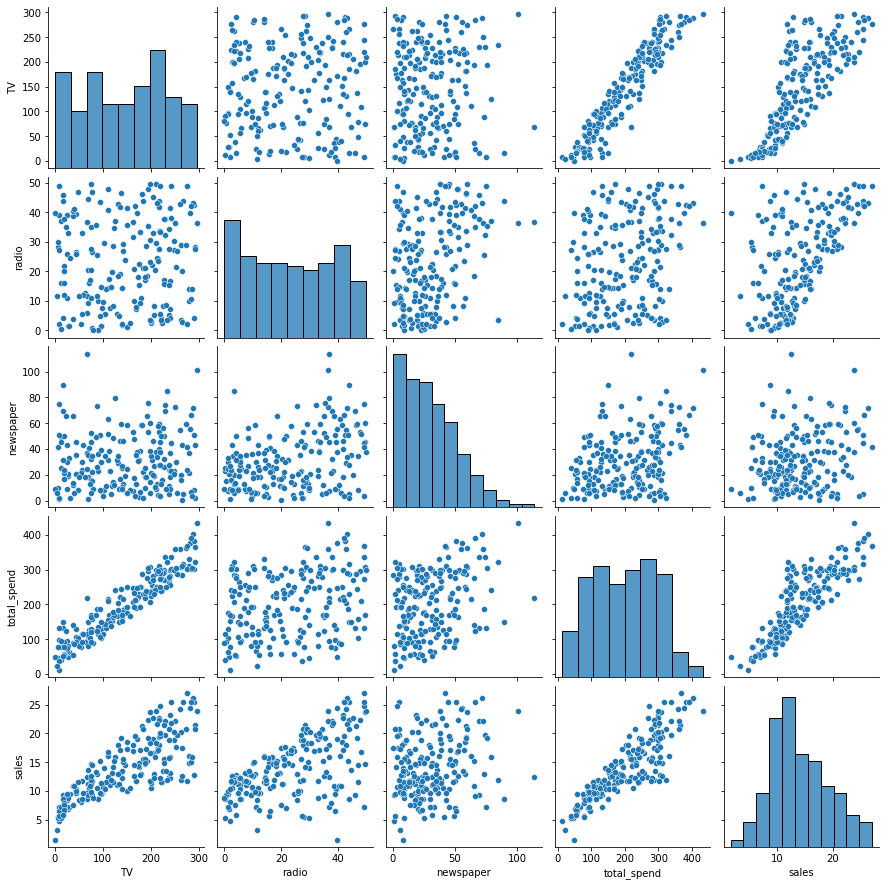

In [7]:
sns.pairplot(df)

In [ ]:
# target feature' göre grafikleri yorumladığımızda total_spend ile sales arasında belirgin lineer bir ilişki var.
# Assumption 1 doğrulanmış oldu.(variable'lar arasında lineer ilişki olmalı)

In [17]:
for i in df.drop(columns="sales"):
    print(f"correlation between sales and {i:<12}: {df.sales.corr(df[i])}")

correlation between sales and TV          : 0.7822244248616061
correlation between sales and radio       : 0.5762225745710551
correlation between sales and newspaper   : 0.22829902637616528
correlation between sales and total_spend : 0.8677123027017427


In [ ]:
# Ayrıca bir de korelasyonlarına bakarak en uygun feature' u bulduk. 

<AxesSubplot:>

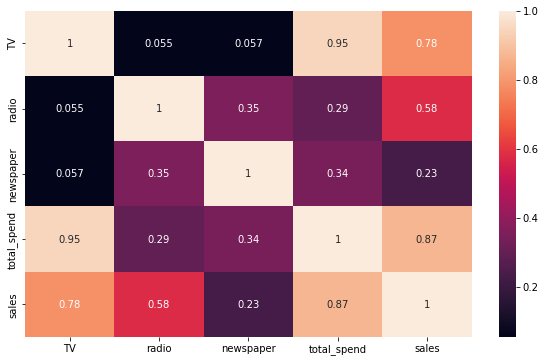

In [19]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Başka bir yöntemm yine heatmap ile de en uygun feature'u bulabilirz.Sonuç olarak total_spend column' ını kullanacağız.

In [22]:
df =df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


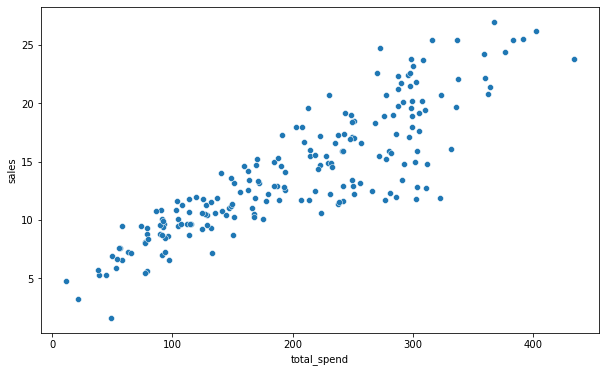

In [23]:
sns.scatterplot(data=df, x="total_spend", y="sales");
# independent variable ile dependent variable arasındaki ilişkiyi kontrol ettik.

In [26]:
corr = df["sales"].corr(df["total_spend"])
corr
# Tekrar bir korelasyonlarına baktık.

0.8677123027017427

In [27]:
R2_score = corr ** 2
R2_score
# R^2 değerine bakarak yorum yapıyoruz.
# toplam reklam harcamalarının satışlara etkisini % 75 oranında. Yani % 25 lik kayıp var.
# Araştırarak satışları etkileyen diğer husular bulunarak yeni feature eklenebilir.
# Simple lineer regresyon özelinde korelasyonun karesini alarak R^2 değerini bulabiliriz.
# Burada hesaplamayı manuel yaptık ancak ilerde kod ile sonuç alacağız.

0.7529246402599608

##### Örnek
Diyelim ki elimizde iki adet ev var. A evi 2+1 olsun. B evi 3+1 olsun. A evinin fiyatı 50.000 dolar, B evinin fiyatı 60.000 dolar olsun. Oda sayısının evin fiyatına etkisini her oda için 3000 dolar varsayalım. Bu durumda  R^2 skorumuz 3000 / (60000 - 50000) yani 0.3 olacak. Yani oda sayımız satışlardaki artışın %30 unu açıklayabiliyor.

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

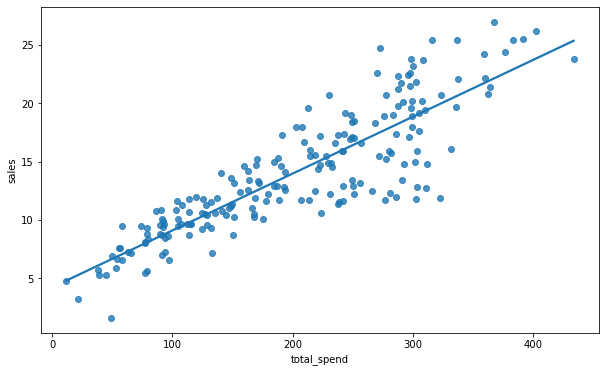

In [29]:
sns.regplot(data=df, x="total_spend", y="sales", ci=False)

In [ ]:
# Burada sns.regplot ile lineer regresyon doğrumuzu çizdirdik.

In [30]:
X = df["total_spend"]
y = df["sales"]
# Datasetimizi independent variables(X) ve dependent variables(y) olarak ikiye böldük.

In [31]:
np.polyfit(X, y, deg=1)
# np.polyfit Least squares polynomial fit anlamına gelmektedir.
# İlk değer (0.04) slope(eğim)'u verir ikinci değer intercept(sabit)'i verir.
# degree = 1 burada linear regresyon model için kullanılır.Denklemin birinci dereceden olduğunu ifade eder.

array([0.04868788, 4.24302822])

In [33]:
slope, intercept = np.polyfit(X, y, deg=1)
print("Slope      :", slope)
print("Intercept  :", intercept)
# y = 0.04x + 4.24 olarak denklemi yazabilirz.

Slope      : 0.048687879319048145
Intercept  : 4.2430282160363255


In [34]:
# y = ax + b formülü üzerinden bir predict alalım.
a, b = np.polyfit(X, y, deg=1)
y_pred = a * X + b
y_pred

# Tüm data için predict edilen değerleri hesapladık ve yazdırdık.

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

In [36]:
# Yeni bir dataframe üzerinde öğrendiklerimizi gösterelim.
values = {"actual_sales":y, "predicted_sales": y_pred, "residual": y - y_pred, "LSE": (y-y_pred)**2}
df_2 = pd.DataFrame(values)
df_2
# residual: hata
# LSE : least square error

,actual_sales,predicted_sales,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [39]:
df_2["residual"].sum().round()
# linear regresyonda hataların toplamı sıfır olur. # hataların karesini almamızın sebeplerinden biri budur.

0.0

In [41]:
# a(slope) ve b(intercept) değerlerini kullanarak başka bir data üzerinden değerlendirme yapalım.
potential_spend = np.linspace(0, 500, 100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [42]:
predicted_sales_lin = a * potential_spend + b
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

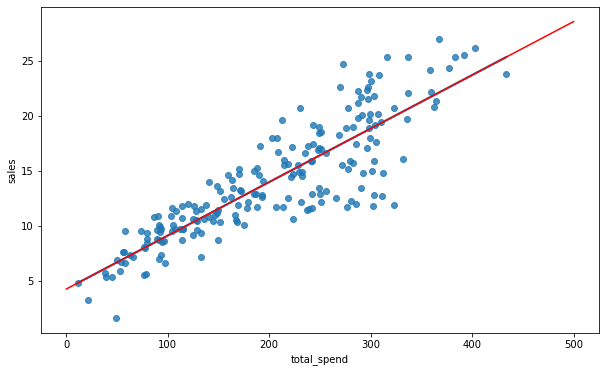

In [48]:
sns.regplot(data=df, x="total_spend", y= "sales", ci=False)
plt.plot(potential_spend, predicted_sales_lin, color="Red")

In [ ]:
# burada doğruların üst üste geldiğni görüyoruz..